In [1]:
import tensorflow as tf

In [2]:
# study_time=[2,4,6,8]
# score=[81,93,91,97]

In [3]:
import numpy as np

In [4]:
np.array([[2, 81],
          [4, 93],
          [6, 91],
          [8, 97]])

array([[ 2, 81],
       [ 4, 93],
       [ 6, 91],
       [ 8, 97]])

In [5]:
X_y = np.array([[2, 81],
                [4, 93],
                [6, 91],
                [8, 97]])

In [6]:
X_y[:, 0]

array([2, 4, 6, 8])

In [8]:
study_mean = X_y[:, 0].mean()

In [9]:
score_mean = X_y[:, 1].mean()

In [11]:
# x 편차

In [10]:
X_y[:, 0] - study_mean

array([-3., -1.,  1.,  3.])

In [ ]:
# y 편차

In [12]:
X_y[:, 1] - score_mean

array([-9.5,  2.5,  0.5,  6.5])

In [13]:
(X_y[:, 0] - study_mean) * (X_y[:, 1] - score_mean)

array([28.5, -2.5,  0.5, 19.5])

In [14]:
sum((X_y[:, 0] - study_mean) * (X_y[:, 1] - score_mean))

46.0

In [15]:
a = sum((X_y[:, 0] - study_mean) * (X_y[:, 1] - score_mean)) / \
    (sum((X_y[:, 0] - study_mean)**2))

In [16]:
a

2.3

In [19]:
intercept = score_mean - (study_mean * a)

In [20]:
intercept

79.0

In [21]:
# 회귀모델

In [22]:
# y = 2.3*x + 79

In [23]:
#  평균 제곱 오차

In [24]:
fake_a = 3
fake_b = 76

In [26]:
def predict(x):
    return fake_a * x + fake_b

In [27]:
predict_result = []

In [29]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [30]:
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.2f, 실제점수=%.2f, 예측점수=%.2f," % (x[i], y[i], predict(x[i])))

공부시간=2.00, 실제점수=81.00, 예측점수=82.00,
공부시간=4.00, 실제점수=93.00, 예측점수=88.00,
공부시간=6.00, 실제점수=91.00, 예측점수=94.00,
공부시간=8.00, 실제점수=97.00, 예측점수=100.00,


In [31]:
n = len(x)


def mse(y, y_pred):
    return (1/n)*sum((y-y_pred)**2)

In [33]:
print("평균 제곱 오차: " + str(mse(y, predict_result)))

평균 제곱 오차: 11.0


In [36]:
import sympy as sp

In [38]:
a, x, b = sp.symbols("a x b")

$$ 

In [39]:
print(a, x, b)

a x b


In [40]:
y = (a*x+b)**2

In [43]:
y

(a*x + b)**2

In [44]:
y.expand()

a**2*x**2 + 2*a*b*x + b**2

In [41]:
sp.diff(y, a)

2*x*(a*x + b)

In [42]:
sp.diff(y, b)

2*a*x + 2*b

In [45]:
x

x

In [46]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [49]:
import matplotlib.pyplot as plt

[]

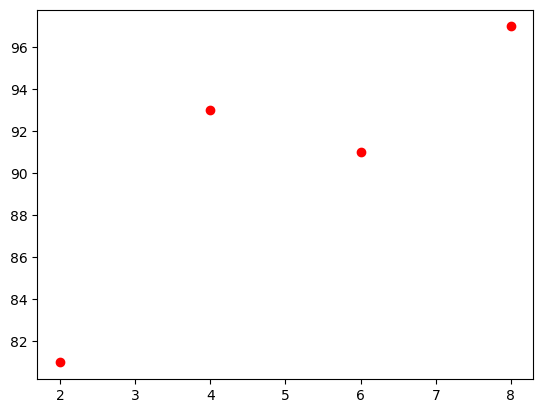

In [52]:
plt.plot(x, y, "or")
plt.plot()

[]

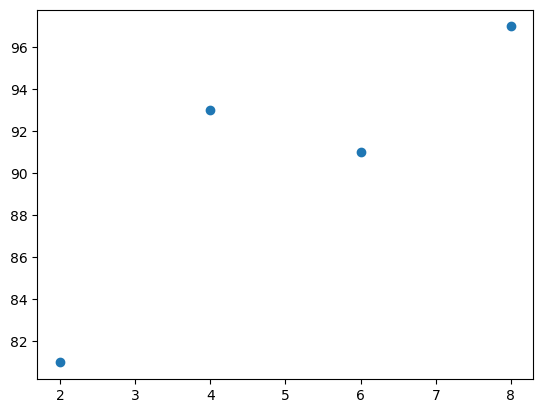

In [53]:
plt.scatter(x, y)
plt.plot()

In [54]:
# 매개변수(parameter, weight) 초기화

In [55]:
a, b = 0, 0

In [56]:
learning_rate = 0.03  # 학습률

In [57]:
epochs = 2001

In [58]:
n = len(x)

In [59]:
for i in range(epochs):
    y_pred = a*x+b
    error = y-y_pred

    a_diff = (2/n)*sum(-x*(error))
    b_diff = (2/n)*sum(-(error))

    a = a-learning_rate*a_diff
    b = b-learning_rate*b_diff

    if i % 100 == 0:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


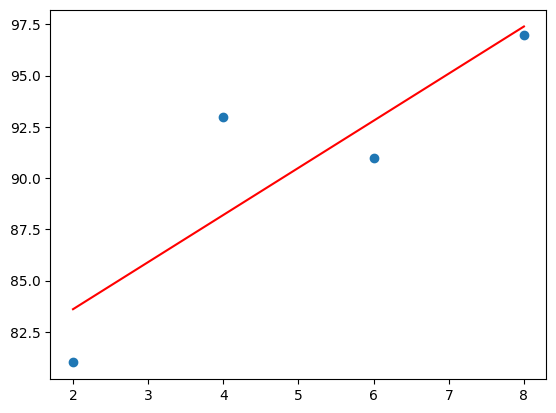

In [60]:
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()